In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()

In [3]:
type(dataset)

sklearn.utils.Bunch

In [4]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
pd_dataset = pd.DataFrame(dataset.data,columns=dataset.feature_names)
pd_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
pd_dataset['PRIX'] = dataset.target

In [9]:
pd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRIX     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
pd_dataset.shape


(506, 14)

In [11]:
pd_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRIX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
pd_dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRIX'],
      dtype='object')

In [13]:
pd_dataset.isnull().value_counts()


CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  PRIX 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
dtype: int64

<h1>--------------------------------------------------</h1>

In [14]:
corr = pd_dataset.corr()
corr.shape

(14, 14)

In [15]:
corr=pd_dataset.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRIX']].corr()


# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
# plt.show()


<AxesSubplot:>

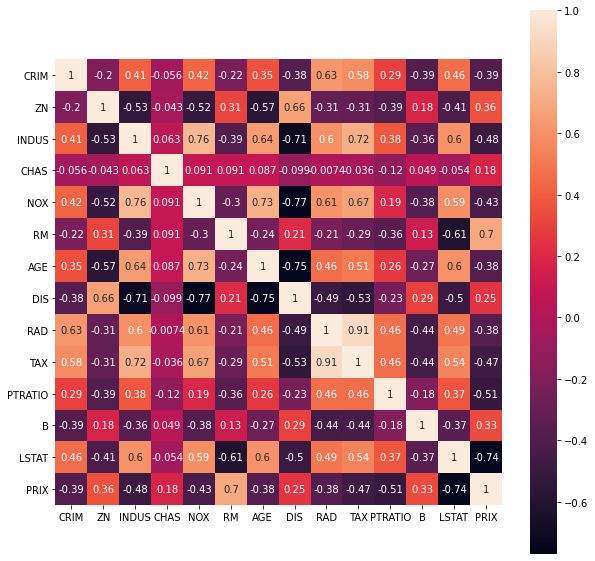

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, annot=True, annot_kws={'size':10})

In [17]:
# X = pd_dataset.iloc[:, :12].values
# X

In [18]:
# y = pd_dataset.iloc[:, 13].values

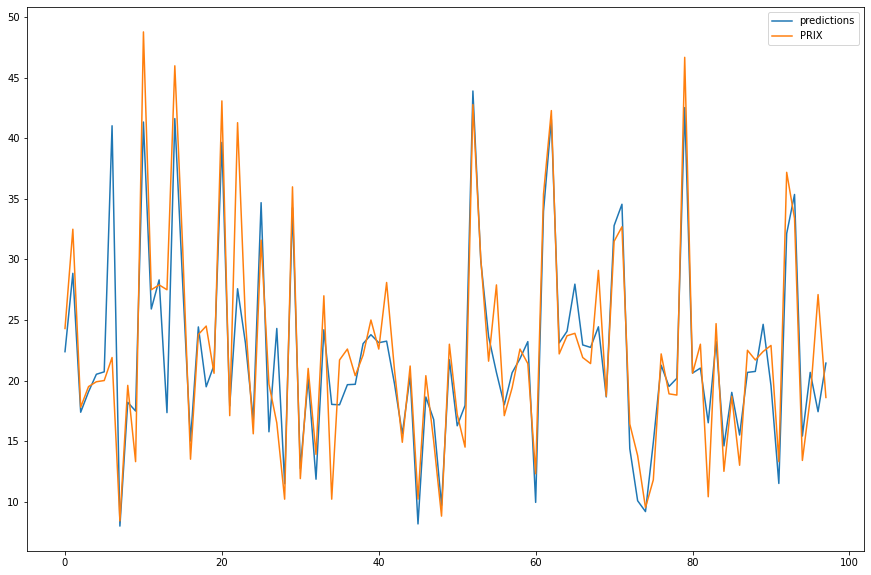

>>------RandomForestRegressor------------<<
>>Precision = 0.8080698379335884
---------------------------------------


In [19]:
val = pd_dataset['PRIX'] == 50
pd_dataset.drop(pd_dataset[val].index,inplace=True)

X = pd_dataset[['LSTAT','RM','TAX','NOX','INDUS']].values
y = pd_dataset['PRIX'].values

# X = pd_dataset[['NOX','RM']].values
# y = pd_dataset['PRIX'].values

# X = pd_dataset[['LSTAT','RM','PTRATIO']].values
# y = pd_dataset['PRIX'].values

# construction du jeu d'entrainement et du jeu de tests

X_APPRENTISSAGE, X_VALIDATION, Y_APPRENTISSAGE, Y_VALIDATION = train_test_split(X, y, test_size= 0.2, random_state= 0)

#Choix de l'alghorithme

algorithme = RandomForestRegressor()

# Apprentissage à l'aide de la fonction fit
algorithme.fit(X_APPRENTISSAGE, Y_APPRENTISSAGE)

#Realisation de prédictions sur le jeu de tests(validation)
predictions = algorithme.predict(X_VALIDATION)

N = 100
plt.subplots(figsize=(15,10))
plt.plot(predictions[:N],label='predictions')
plt.plot(Y_VALIDATION[:N],label='PRIX')
plt.legend()
plt.show()

# calcul de la précision de l'apprentissage à l'aide de la foction r2_score
precision = r2_score(Y_VALIDATION, predictions)

print(">>------RandomForestRegressor------------<<")
print(">>Precision = " + str(precision))
print("---------------------------------------")

<function matplotlib.pyplot.show(close=None, block=None)>

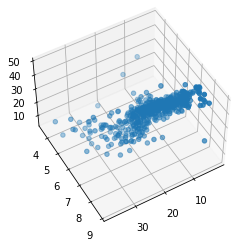

In [20]:
ax = plt.axes(projection='3d')
ax.view_init(50,60)
ax.scatter3D(pd_dataset['LSTAT'],pd_dataset['RM'],pd_dataset['PRIX'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

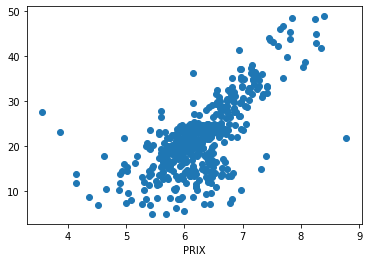

In [21]:
plt.plot(pd_dataset['RM'],pd_dataset['PRIX'],"o")
plt.xlabel('PRIX')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

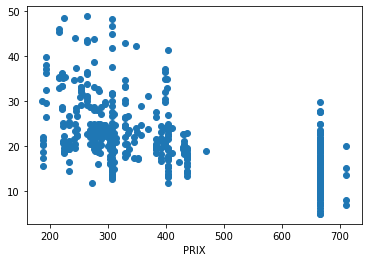

In [22]:
plt.plot(pd_dataset['TAX'],pd_dataset['PRIX'],"o")
plt.xlabel('PRIX')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

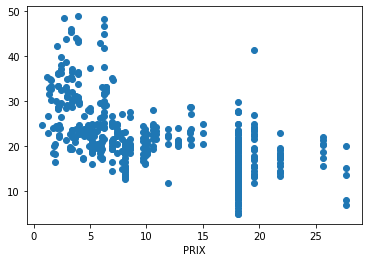

In [23]:
plt.plot(pd_dataset['INDUS'],pd_dataset['PRIX'],"o")
plt.xlabel('PRIX')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

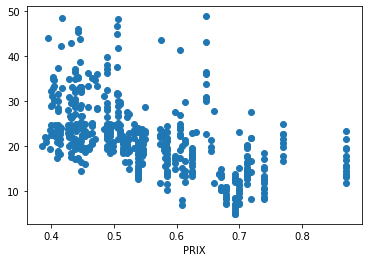

In [24]:
plt.plot(pd_dataset['NOX'],pd_dataset['PRIX'],"o")
plt.xlabel('PRIX')
plt.show

In [2]:
import sklearn.externals 
import joblib
fichier = 'data_boston/boston.mod'
joblib.dump(algorithme, fichier)

NameError: name 'algorithme' is not defined

In [ ]:
# la fonction pour l'estimation de prix #['LSTAT','RM','TAX','NOX','INDUS']

def predictions():
    
    while True:
        modele_prediction = joblib.load('data_boston/boston.mod')


        LSTAT = input('Veuillez rentrer les valeurs suivantes \nLSTAT-  % lower status of the population :')
        RM = input('RM - average number of rooms per dwelling :')
        TAX = input('TAX - full-value property-tax rate per $10,000')
        NOX = input('NOX - nitric oxides concentration (parts per 10 million)')
        INDUS = input('INDUS - proportion of non-retail business acres per town.')
        
        try:
            prediction_PRIX = modele_prediction.predict(['LSTAT','RM','TAX','NOX','INDUS'])
            print("prediction_PRIX",prediction_PRIX)
        except:
            print("entrées incorrect")

print(predictions())

Veuillez rentrer les valeurs suivantes 
LSTAT-  % lower status of the population :3
RM - average number of rooms per dwelling :3
TAX - full-value property-tax rate per $10,0003
NOX - nitric oxides concentration (parts per 10 million)33
INDUS - proportion of non-retail business acres per town.3
entrées incorrect


In [51]:
# #Choix de l'alghorithme
# algorithme1 = LinearRegression()
# type(algorithme1)
# algorithme1.fit(X_APPRENTISSAGE, Y_APPRENTISSAGE)
# predictions = algorithme1.predict(X_VALIDATION)
# calcul de la précision de l'apprentissage à l'aide de la foction r2_score en comparent
# les valeurs prédits (predictions) et les valeurs attendues(Y_VALIDATION)
# precision = r2_score(Y_VALIDATION, predictions)
# print(">>------REGRESSION LINEAIRE------------<<")
# print(">>Precision = " + str(precision))
# print("---------------------------------------")

In [55]:
#Choix de l'alghorithme
# from sklearn.tree import DecisionTreeRegressor
# algorithme2 = DecisionTreeRegressor()

# # Apprentissage à l'aide de la fonction fit
# algorithme2.fit(X_APPRENTISSAGE, Y_APPRENTISSAGE)

# #Realisation de prédictions sur le jeu de tests(validation)
# predictions = algorithme2.predict(X_VALIDATION)

# # calcul de la précision de l'apprentissage à l'aide de la foction r2_score
# precision = r2_score(Y_VALIDATION, predictions)

# print(">>------DecisionTreeRegressor------------<<")
# print(">>Precision = " + str(precision))
# print("---------------------------------------")

In [ ]:
# Plotting the heatmap of correlation between features
# plt.figure(figsize=(20,20))
# sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')